In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Datasets/lightning_strikes.csv')

In [3]:
df.head(3)

date  number_of_strikes center_point_geom
0  2018-01-03                194     POINT(-75 27)
1  2018-01-03                 41   POINT(-78.4 29)
2  2018-01-03                 33   POINT(-73.9 27)

In [4]:
df.shape

(3401012, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [6]:
df['date']= pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [8]:
df.groupby(["date"]).sum(numeric_only=True).sort_values("number_of_strikes",ascending=False).head(3)

number_of_strikes
date                         
2018-08-29            1070457
2018-08-17             969774
2018-08-28             917199

In [9]:
df['month'] = df['date'].dt.month
df.head(3)

date  number_of_strikes center_point_geom  month
0 2018-01-03                194     POINT(-75 27)      1
1 2018-01-03                 41   POINT(-78.4 29)      1
2 2018-01-03                 33   POINT(-73.9 27)      1

In [10]:
df.groupby(["month"]).sum(numeric_only=True).sort_values("number_of_strikes",ascending=False)

number_of_strikes
month                   
8               15525255
7                8320400
6                6445083
5                4166726
9                3018336
2                2071315
4                1524339
10               1093962
1                 860045
3                 854168
11                409263
12                312097

In [11]:
df["month_txt"] = df['date'].dt.month_name().str.slice(stop=3)
df.head(3)

date  number_of_strikes center_point_geom  month month_txt
0 2018-01-03                194     POINT(-75 27)      1       Jan
1 2018-01-03                 41   POINT(-78.4 29)      1       Jan
2 2018-01-03                 33   POINT(-73.9 27)      1       Jan

In [12]:
df_by_month = df.groupby(['month', 'month_txt']).sum(numeric_only=True).sort_values(
    'month', ascending=True).head(12).reset_index()
df_by_month

month month_txt  number_of_strikes
0       1       Jan             860045
1       2       Feb            2071315
2       3       Mar             854168
3       4       Apr            1524339
4       5       May            4166726
5       6       Jun            6445083
6       7       Jul            8320400
7       8       Aug           15525255
8       9       Sep            3018336
9      10       Oct            1093962
10     11       Nov             409263
11     12       Dec             312097

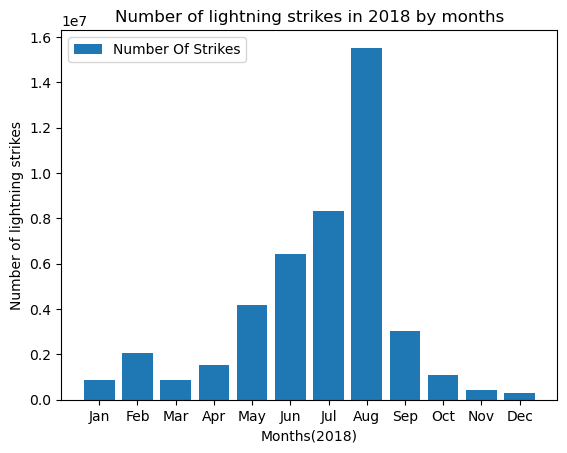

In [13]:
plt.bar(x=df_by_month["month_txt"],height=df_by_month['number_of_strikes'],label = "Number Of Strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

In [67]:
df = pd.read_csv('/Datasets/lightning_strikes3.csv')
df.head()

date  number_of_strikes   center_point_geom
0  2016-08-05                 16  POINT(-101.5 24.7)
1  2016-08-05                 16     POINT(-85 34.3)
2  2016-08-05                 16     POINT(-89 41.4)
3  2016-08-05                 16   POINT(-89.8 30.7)
4  2016-08-05                 16   POINT(-86.2 37.9)

In [68]:
df.shape

(10479003, 3)

In [70]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')
df.head()

date  number_of_strikes   center_point_geom      week    month  \
0 2016-08-05                 16  POINT(-101.5 24.7)  2016-W31  2016-08   
1 2016-08-05                 16     POINT(-85 34.3)  2016-W31  2016-08   
2 2016-08-05                 16     POINT(-89 41.4)  2016-W31  2016-08   
3 2016-08-05                 16   POINT(-89.8 30.7)  2016-W31  2016-08   
4 2016-08-05                 16   POINT(-86.2 37.9)  2016-W31  2016-08   

   quarter  year  
0  2016-Q3  2016  
1  2016-Q3  2016  
2  2016-Q3  2016  
3  2016-Q3  2016  
4  2016-Q3  2016

In [72]:
df_by_week_2018 = df[df['year'] == '2018'].groupby(
    ['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()


week  number_of_strikes
0  2018-W01              34843
1  2018-W02             353425
2  2018-W03              37132
3  2018-W04             412772
4  2018-W05              34972

Text(0.5, 1.0, 'Number of lightning strikes per week (2018)')

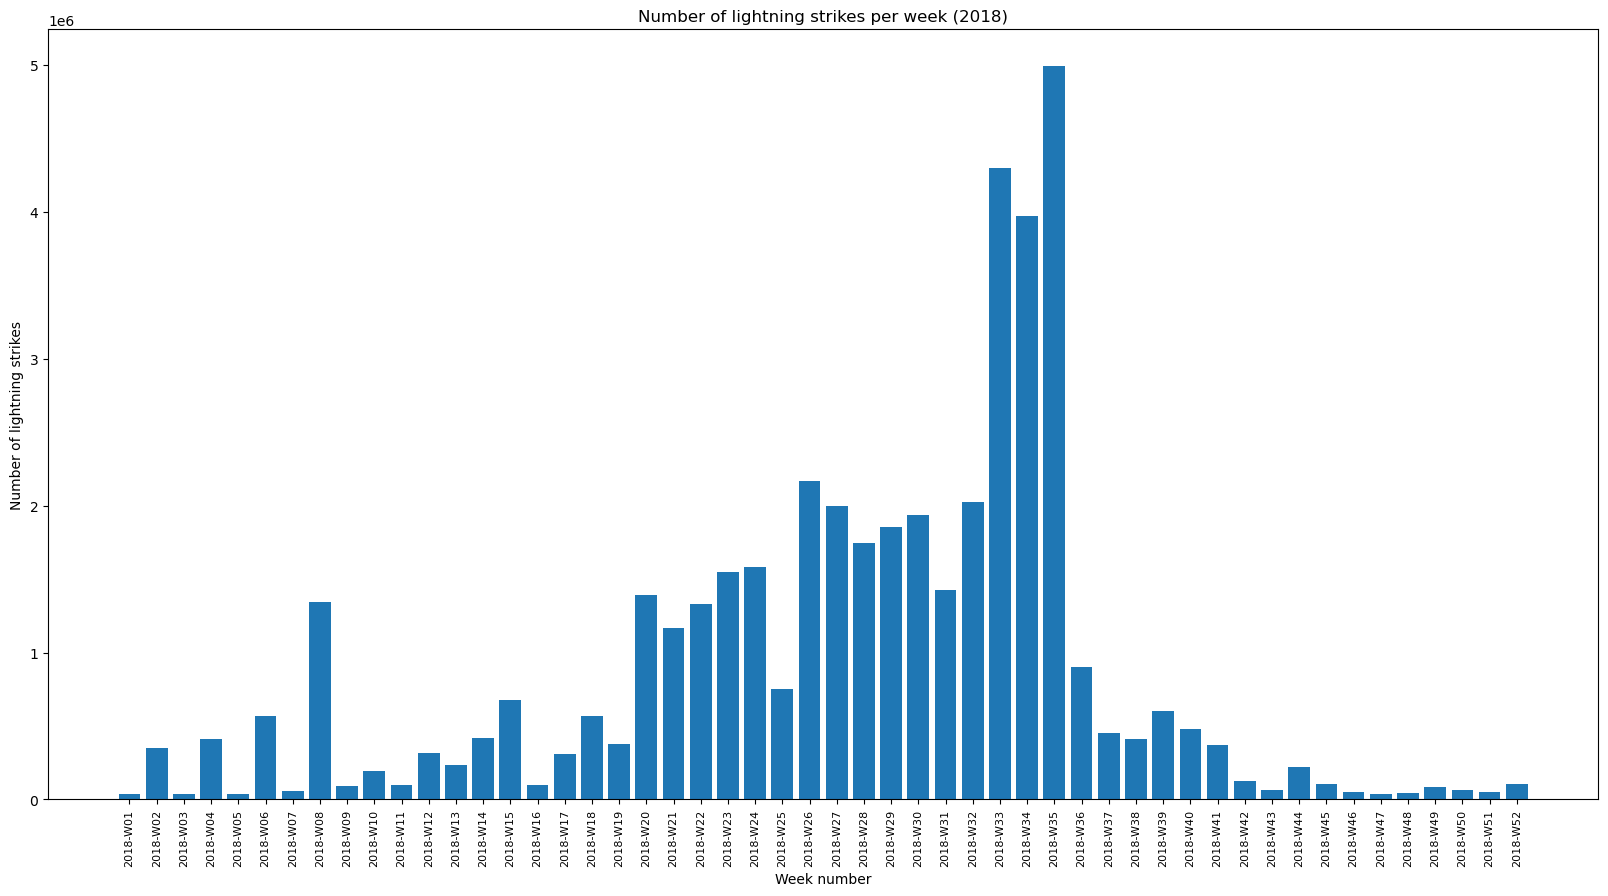

In [73]:
plt.figure(figsize=(20,10))
plt.bar(x=df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.xticks(rotation=90, fontsize=8)
plt.title("Number of lightning strikes per week (2018)")


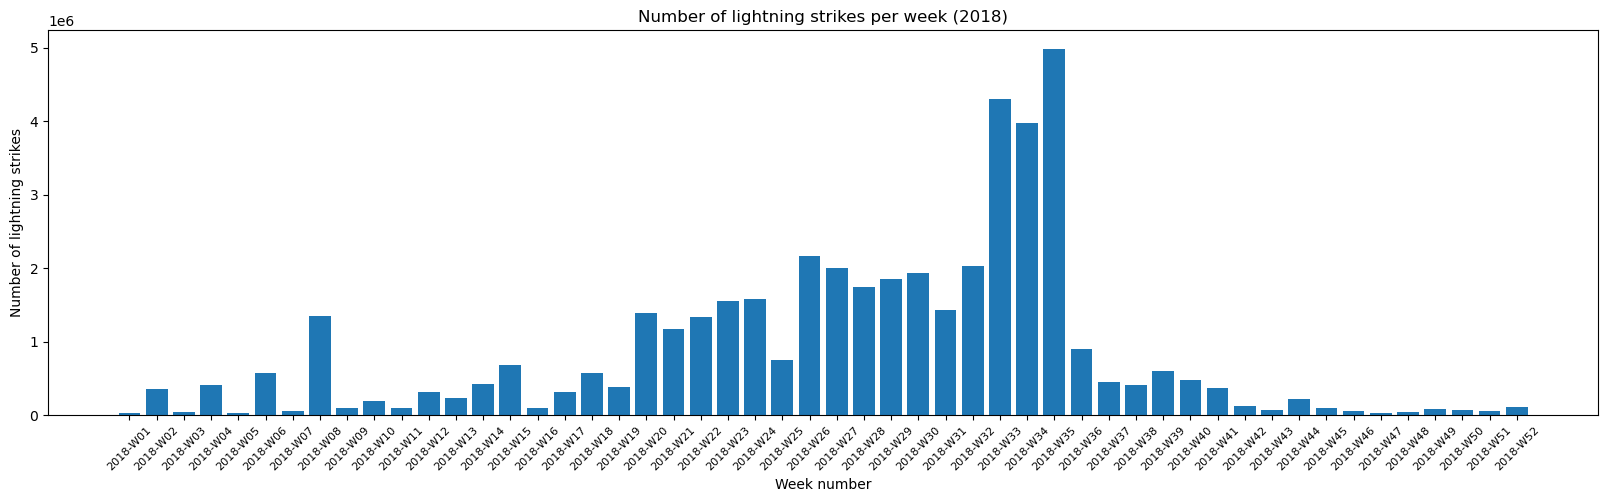

In [74]:
plt.figure(figsize=(20, 5))
plt.bar(x=df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation=45, fontsize=8)

plt.show()


In [75]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

In [76]:
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

quarter  number_of_strikes number_of_strikes_formatted
0  2016-Q1            2683798                        2.7M
1  2016-Q2           15084857                       15.1M
2  2016-Q3           21843820                       21.8M
3  2016-Q4            1969754                        2.0M
4  2017-Q1            2444279                        2.4M

In [77]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha='center', va='bottom')


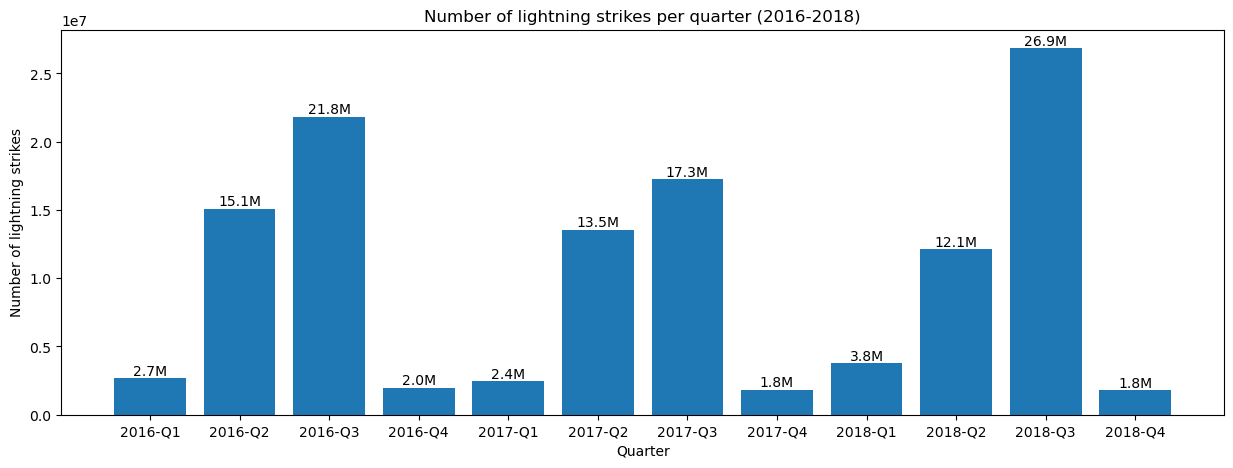

In [78]:
plt.figure(figsize=(15, 5))
plt.bar(x=df_by_quarter['quarter'], height=df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'],
          df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()


In [79]:
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()


quarter  number_of_strikes number_of_strikes_formatted quarter_number  year
0  2016-Q1            2683798                        2.7M             Q1  2016
1  2016-Q2           15084857                       15.1M             Q2  2016
2  2016-Q3           21843820                       21.8M             Q3  2016
3  2016-Q4            1969754                        2.0M             Q4  2016
4  2017-Q1            2444279                        2.4M             Q1  2017

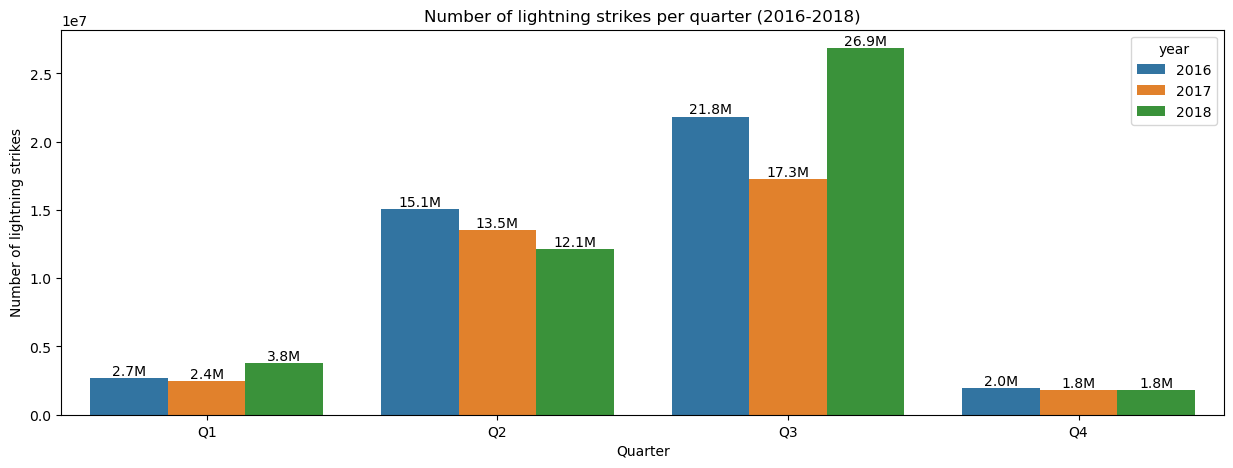

In [80]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

In [81]:
df = pd.read_csv('/Datasets/lightning_strikes.csv')


In [60]:
df.drop_duplicates().shape

(3401012, 9)

In [61]:
df.sort_values(by='number_of_strikes', ascending=False).head(10)

date  number_of_strikes  center_point_geom    month month_txt  \
302758 2018-08-20               2211  POINT(-92.5 35.5)  2018-08       Aug   
278383 2018-08-16               2142  POINT(-96.1 36.1)  2018-08       Aug   
280830 2018-08-17               2061  POINT(-90.2 36.1)  2018-08       Aug   
280453 2018-08-17               2031  POINT(-89.9 35.9)  2018-08       Aug   
278382 2018-08-16               1902  POINT(-96.2 36.1)  2018-08       Aug   
11517  2018-02-10               1899  POINT(-95.5 28.1)  2018-02       Feb   
277506 2018-08-16               1878  POINT(-89.7 31.5)  2018-08       Aug   
24906  2018-02-25               1833  POINT(-98.7 28.9)  2018-02       Feb   
284320 2018-08-17               1767    POINT(-90.1 36)  2018-08       Aug   
24825  2018-02-25               1741      POINT(-98 29)  2018-02       Feb   

            week   weekday  quarter  year  
302758  2018-W34    Monday  2018-Q3  2018  
278383  2018-W33  Thursday  2018-Q3  2018  
280830  2018-W33    Friday  2018-Q3  2018  
280453  2018-W33    Friday  2018-Q3  2018  
278382  2018-W33  Thursday  2018-Q3  2018  
11517   2018-W06  Saturday  2018-Q1  2018  
277506  2018-W33  Thursday  2018-Q3  2018  
24906   2018-W08    Sunday  2018-Q1  2018  
284320  2018-W33    Friday  2018-Q3  2018  
24825   2018-W08    Sunday  2018-Q1  2018

In [62]:
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: count, Length: 170855, dtype: int64

In [63]:
df.center_point_geom.value_counts()[:10].rename_axis(
    'unique_values').reset_index(name='counts').style.background_gradient()


In [18]:
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

date  number_of_strikes center_point_geom  month month_txt  week  \
0 2018-01-03                194     POINT(-75 27)      1       Jan     1   
1 2018-01-03                 41   POINT(-78.4 29)      1       Jan     1   
2 2018-01-03                 33   POINT(-73.9 27)      1       Jan     1   
3 2018-01-03                 38   POINT(-73.8 27)      1       Jan     1   
4 2018-01-03                 92     POINT(-79 28)      1       Jan     1   

     weekday  
0  Wednesday  
1  Wednesday  
2  Wednesday  
3  Wednesday  
4  Wednesday

In [19]:
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

number_of_strikes
weekday                     
Friday             13.349972
Monday             13.152804
Saturday           12.732694
Sunday             12.324717
Thursday           13.240594
Tuesday            13.813599
Wednesday          13.224568

In [20]:
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

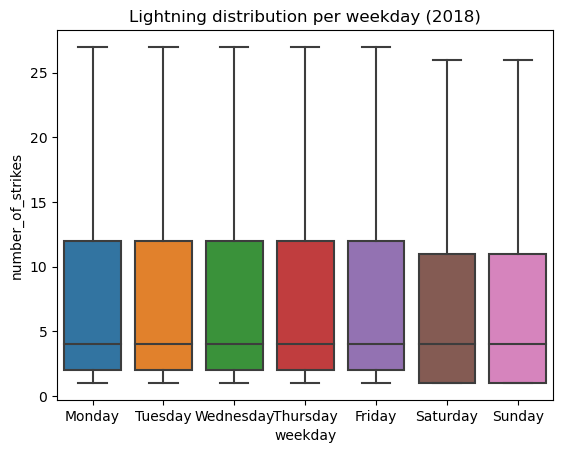

In [24]:
g = sns.boxplot(data=df,
                x='weekday',
                y='number_of_strikes',
                order=weekday_order,
                showfliers=False
                )
g.set_title('Lightning distribution per weekday (2018)');

In [34]:
df2 = pd.read_csv("/Datasets/lightning_strikes2.csv")
df2.head()

date  number_of_strikes  center_point_geom
0  2016-01-04                 55  POINT(-83.2 21.1)
1  2016-01-04                 33  POINT(-83.1 21.1)
2  2016-01-05                 46  POINT(-77.5 22.1)
3  2016-01-05                 28  POINT(-76.8 22.3)
4  2016-01-05                 28    POINT(-77 22.1)

In [35]:
df2['date'] = pd.to_datetime(df2['date'])

In [36]:
full = pd.concat([df.drop(['weekday','week'],axis=1), df2], ignore_index=True)
full.head()

date  number_of_strikes center_point_geom  month month_txt
0 2018-01-03                194     POINT(-75 27)    1.0       Jan
1 2018-01-03                 41   POINT(-78.4 29)    1.0       Jan
2 2018-01-03                 33   POINT(-73.9 27)    1.0       Jan
3 2018-01-03                 38   POINT(-73.8 27)    1.0       Jan
4 2018-01-03                 92     POINT(-79 28)    1.0       Jan

In [37]:
full['year'] = full.date.dt.year
full['month'] = full.date.dt.month
full['month_txt'] = full.date.dt.month_name()
full.head()

date  number_of_strikes center_point_geom  month month_txt  year
0 2018-01-03                194     POINT(-75 27)      1   January  2018
1 2018-01-03                 41   POINT(-78.4 29)      1   January  2018
2 2018-01-03                 33   POINT(-73.9 27)      1   January  2018
3 2018-01-03                 38   POINT(-73.8 27)      1   January  2018
4 2018-01-03                 92     POINT(-79 28)      1   January  2018

In [38]:
full[['year','number_of_strikes']].groupby(['year']).sum()

number_of_strikes
year                   
2016           41582229
2017           35095195
2018           44600989

In [39]:
lightning_by_month = full.groupby(['month_txt', 'year']).agg(
    number_of_strikes=pd.NamedAgg(column='number_of_strikes', aggfunc=sum)
).reset_index()

lightning_by_month.head()


month_txt  year  number_of_strikes
0     April  2016            2636427
1     April  2017            3819075
2     April  2018            1524339
3    August  2016            7250442
4    August  2017            6021702

In [40]:
lightning_by_year = full.groupby(['year']).agg(
    year_strikes=pd.NamedAgg(column='number_of_strikes', aggfunc=sum)
).reset_index()

lightning_by_year.head()


year  year_strikes
0  2016      41582229
1  2017      35095195
2  2018      44600989

In [41]:
percentage_lightning = lightning_by_month.merge(lightning_by_year, on='year')
percentage_lightning.head()

month_txt  year  number_of_strikes  year_strikes
0     April  2016            2636427      41582229
1    August  2016            7250442      41582229
2  December  2016             316450      41582229
3  February  2016             312676      41582229
4   January  2016             313595      41582229

In [42]:
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes /
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

month_txt  year  number_of_strikes  year_strikes  \
0     April  2016            2636427      41582229   
1    August  2016            7250442      41582229   
2  December  2016             316450      41582229   
3  February  2016             312676      41582229   
4   January  2016             313595      41582229   

   percentage_lightning_per_month  
0                        6.340273  
1                       17.436396  
2                        0.761022  
3                        0.751946  
4                        0.754156

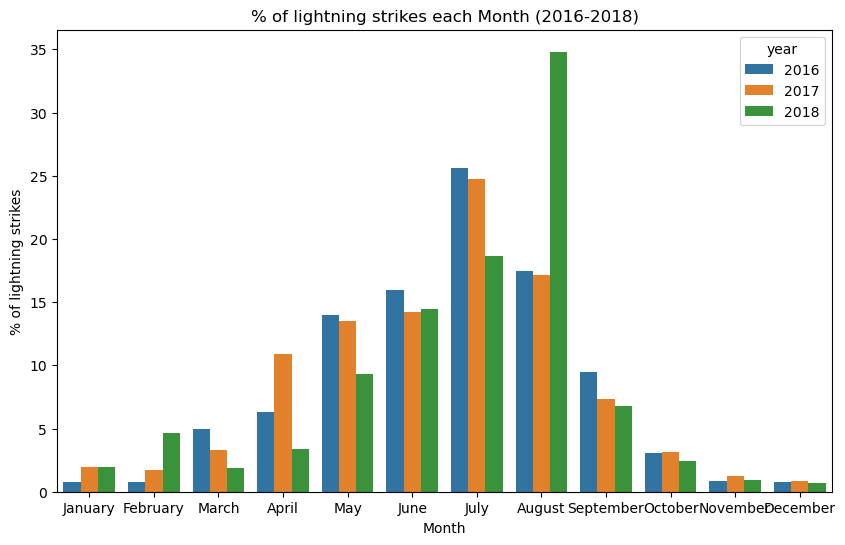

In [43]:
plt.figure(figsize=(10, 6))

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data=percentage_lightning,
    x='month_txt',
    y='percentage_lightning_per_month',
    hue='year',
    order=month_order)
plt.xlabel("Month")
plt.ylabel("% of lightning strikes")
plt.title("% of lightning strikes each Month (2016-2018)");

In [2]:
df = pd.read_csv('/Datasets/cleaning/eda_missing_data_dataset1.csv')

In [3]:
df.head()

date  center_point_geom  longitude  latitude  number_of_strikes
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                 48
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                 32
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                118
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                 69
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                 44

In [4]:
df.shape

(717530, 5)

In [5]:
df_zip = pd.read_csv('/Datasets/cleaning/eda_missing_data_dataset2.csv')

In [6]:
df_zip.head()

date  zip_code                                 city          state  \
0  2018-08-08      3281                                Weare  New Hampshire   
1  2018-08-14      6488                 Heritage Village CDP    Connecticut   
2  2018-08-16     97759  Sisters city, Black Butte Ranch CDP         Oregon   
3  2018-08-18      6776                      New Milford CDP    Connecticut   
4  2018-08-08      1077                            Southwick  Massachusetts   

  state_code   center_point_geom  number_of_strikes  
0         NH   POINT(-71.7 43.1)                  1  
1         CT   POINT(-73.2 41.5)                  3  
2         OR  POINT(-121.4 44.3)                  3  
3         CT   POINT(-73.4 41.6)                 48  
4         MA     POINT(-72.8 42)                  2

In [8]:
df_zip.shape

(323700, 7)

In [9]:
df_joined = df.merge(df_zip, how='left', on=['date','center_point_geom'])

In [10]:
df_joined.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

In [11]:
df_joined.describe()


longitude       latitude  number_of_strikes_x       zip_code  \
count  717530.000000  717530.000000        717530.000000  323700.000000   
mean      -90.875445      33.328572            21.637081   57931.958996   
std        13.648429       7.938831            48.029525   22277.327411   
min      -133.900000      16.600000             1.000000    1002.000000   
25%      -102.800000      26.900000             3.000000   38260.750000   
50%       -90.300000      33.200000             6.000000   59212.500000   
75%       -80.900000      39.400000            21.000000   78642.000000   
max       -43.800000      51.700000          2211.000000   99402.000000   

       number_of_strikes_y  
count        323700.000000  
mean             25.410587  
std              57.421824  
min               1.000000  
25%               3.000000  
50%               8.000000  
75%              24.000000  
max            2211.000000

In [12]:
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(393830, 10)

In [13]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 717530 non-null  object 
 1   center_point_geom    717530 non-null  object 
 2   longitude            717530 non-null  float64
 3   latitude             717530 non-null  float64
 4   number_of_strikes_x  717530 non-null  int64  
 5   zip_code             323700 non-null  float64
 6   city                 323700 non-null  object 
 7   state                323700 non-null  object 
 8   state_code           323700 non-null  object 
 9   number_of_strikes_y  323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.7+ MB


In [14]:
df_null_geo.head()


date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

In [15]:
top_missing = df_null_geo[['latitude', 'longitude', 'number_of_strikes_x']
                          ].groupby(['latitude', 'longitude']
                                    ).sum().sort_values('number_of_strikes_x', ascending=False).reset_index()
top_missing.head(10)


latitude  longitude  number_of_strikes_x
0      22.4      -84.2                 3841
1      22.9      -82.9                 3184
2      22.4      -84.3                 2999
3      22.9      -83.0                 2754
4      22.5      -84.1                 2746
5      22.5      -84.2                 2738
6      22.3      -81.0                 2680
7      22.9      -82.4                 2652
8      22.9      -82.3                 2618
9      22.3      -84.3                 2551

In [17]:
import plotly.express as px  
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x >= 300], 
                     lat="latitude",  
                     lon="longitude",  
                     size="number_of_strikes_x")  
fig.update_layout(
    title_text='Missing data',
)

fig.show()


In [18]:
import plotly.express as px  
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x >= 300],  
                     lat="latitude",  
                     lon="longitude", 
                     size="number_of_strikes_x")  
fig.update_layout(
    title_text='Missing data',  
    geo_scope='usa',  )

fig.show()


In [20]:
df = pd.read_csv('/Datasets/cleaning/eda_outliers_dataset1.csv')
df.head()

year  number_of_strikes
0  2020           15620068
1  2019             209166
2  2018           44600989
3  2017           35095195
4  2016           41582229

In [21]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)

In [22]:
df.head(3)

year  number_of_strikes number_of_strikes_readable
0  2020           15620068                      15.6M
1  2019             209166                       209K
2  2018           44600989                      44.6M

In [23]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_15264\296782031.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Yearly number of lightning strikes')

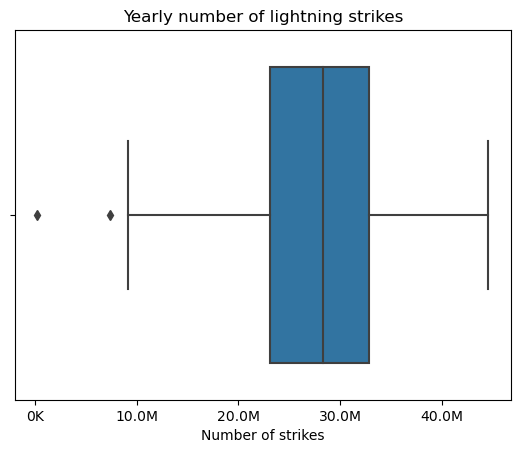

In [24]:
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes')

In [25]:
percentile25 = df['number_of_strikes'].quantile(0.25)

percentile75 = df['number_of_strikes'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))

Lower limit is: 8.6M


In [26]:
df[df['number_of_strikes'] < lower_limit]


year  number_of_strikes number_of_strikes_readable
1   2019             209166                       209K
33  1987            7378836                       7.4M

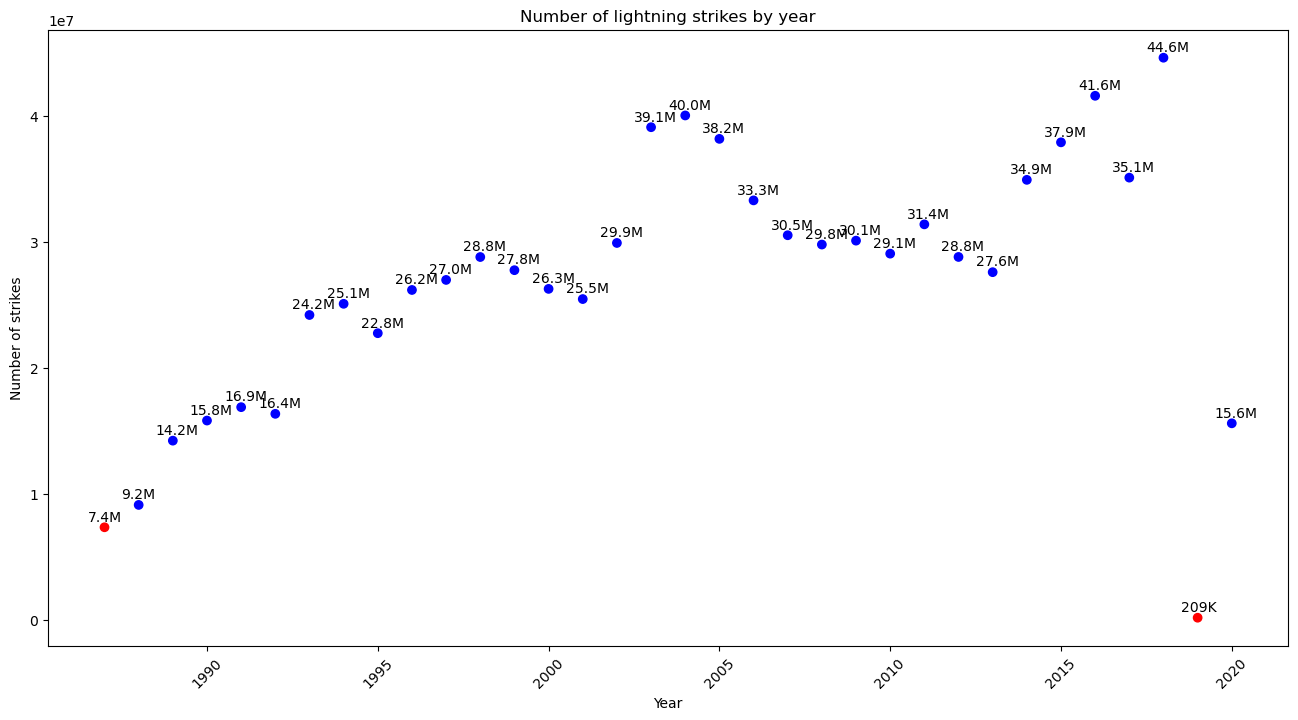

In [27]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))


colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['year'], df['number_of_strikes'], c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

In [28]:
df_2019 = pd.read_csv('/Datasets/cleaning/eda_outliers_dataset2.csv')
df_2019.head(2)

date  number_of_strikes  center_point_geom
0  2019-12-01                  1  POINT(-79.7 35.3)
1  2019-12-01                  1  POINT(-84.7 39.3)

In [30]:
df_2019['date'] = pd.to_datetime(df_2019['date'])


df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)

df_2019_by_month = df_2019.groupby(['month', 'month_txt']).sum(numeric_only=True
).sort_values('month', ascending=True).head(12).reset_index()
df_2019_by_month


month month_txt  number_of_strikes
0     12       Dec             209166

In [31]:
df_1987 = pd.read_csv('/Datasets/cleaning/eda_outliers_dataset3.csv')
df_1987.head(3)

date  number_of_strikes  center_point_geom
0  1987-01-01                 21    POINT(-80.7 26)
1  1987-01-04                 23  POINT(-83.2 28.3)
2  1987-01-05                 40  POINT(-78.9 31.3)

In [33]:
df_1987['date'] = pd.to_datetime(df_1987['date'])

df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)

df_1987_by_month = df_1987.groupby(['month', 'month_txt']).sum(numeric_only=True
).sort_values('month', ascending=True).head(12).reset_index()
df_1987_by_month


month month_txt  number_of_strikes
0       1       Jan              23044
1       2       Feb              61020
2       3       Mar             117877
3       4       Apr             157890
4       5       May             700910
5       6       Jun            1064166
6       7       Jul            2077619
7       8       Aug            2001899
8       9       Sep             869833
9      10       Oct             105627
10     11       Nov             155290
11     12       Dec              43661

In [34]:
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

print(
    "Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" +
      readable_numbers(np.median(df_without_outliers['number_of_strikes'])))


Mean:28.2M
Median:28.8M


In [36]:
df = pd.read_csv('/Datasets/cleaning/eda_label_encoding_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [37]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month_name().str.slice(stop=3)

In [39]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

df['year'] = df['date'].dt.strftime('%Y')

df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()
df_by_month.head()


year month  number_of_strikes
0  2016   Jan             313595
1  2016   Feb             312676
2  2016   Mar            2057527
3  2016   Apr            2636427
4  2016   May            5800500

In [40]:
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels=['Mild', 'Scattered', 'Heavy', 'Severe'])
df_by_month.head()

year month  number_of_strikes strike_level
0  2016   Jan             313595         Mild
1  2016   Feb             312676         Mild
2  2016   Mar            2057527    Scattered
3  2016   Apr            2636427        Heavy
4  2016   May            5800500       Severe

In [41]:
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()


year month  number_of_strikes strike_level  strike_level_code
0  2016   Jan             313595         Mild                  0
1  2016   Feb             312676         Mild                  0
2  2016   Mar            2057527    Scattered                  1
3  2016   Apr            2636427        Heavy                  2
4  2016   May            5800500       Severe                  3

In [42]:
pd.get_dummies(df_by_month['strike_level'])


Mild  Scattered  Heavy  Severe
0    True      False  False   False
1    True      False  False   False
2   False       True  False   False
3   False      False   True   False
4   False      False  False    True
5   False      False  False    True
6   False      False  False    True
7   False      False  False    True
8   False      False   True   False
9   False       True  False   False
10   True      False  False   False
11   True      False  False   False
12  False       True  False   False
13   True      False  False   False
14  False       True  False   False
15  False      False   True   False
16  False      False   True   False
17  False      False   True   False
18  False      False  False    True
19  False      False  False    True
20  False      False   True   False
21  False       True  False   False
22   True      False  False   False
23   True      False  False   False
24  False       True  False   False
25  False      False   True   False
26  False       True  False   False
27  False       True  False   False
28  False      False   True   False
29  False      False  False    True
30  False      False  False    True
31  False      False  False    True
32  False      False   True   False
33  False       True  False   False
34   True      False  False   False
35   True      False  False   False

In [43]:
df_by_month_plot = df_by_month.pivot(
    index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()


month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
2016     0    0    1    2    3    3    3    3    2    1    0    0
2017     1    0    1    2    2    2    3    3    2    1    0    0
2018     1    2    1    1    2    3    3    3    2    1    0    0

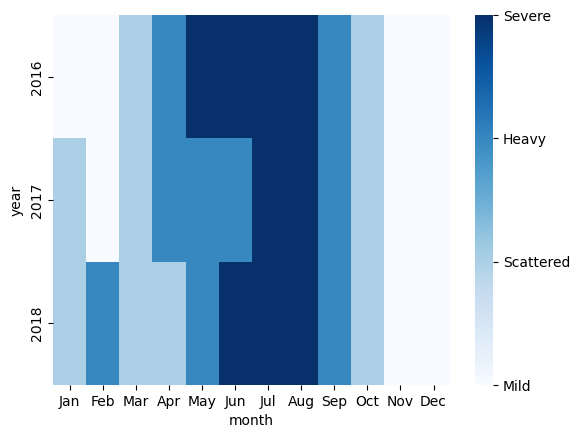

In [44]:
ax = sns.heatmap(df_by_month_plot, cmap='Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()


In [45]:
df = pd.read_csv('/Datasets/cleaning/eda_input_validation_joining_dataset1.csv')


In [46]:
df.head(3)

date  number_of_strikes center_point_geom  longitude  latitude
0  2018-01-03                194     POINT(-75 27)      -75.0      27.0
1  2018-01-03                 41   POINT(-78.4 29)      -78.4      29.0
2  2018-01-03                 33   POINT(-73.9 27)      -73.9      27.0

In [47]:
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


In [48]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
longitude            0
latitude             0
dtype: int64

In [50]:
df.describe(include='all')

date  number_of_strikes  center_point_geom  \
count                         3401012       3.401012e+06            3401012   
unique                            NaN                NaN             170855   
top                               NaN                NaN  POINT(-81.5 22.5)   
freq                              NaN                NaN                108   
mean    2018-07-13 03:32:02.018504960       1.311403e+01                NaN   
min               2018-01-01 00:00:00       1.000000e+00                NaN   
25%               2018-06-04 00:00:00       2.000000e+00                NaN   
50%               2018-07-18 00:00:00       4.000000e+00                NaN   
75%               2018-08-24 00:00:00       1.200000e+01                NaN   
max               2018-12-31 00:00:00       2.211000e+03                NaN   
std                               NaN       3.212099e+01                NaN   

           longitude      latitude  
count   3.401012e+06  3.401012e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean   -9.081778e+01  3.374688e+01  
min    -1.418000e+02  1.660000e+01  
25%    -1.008000e+02  2.760000e+01  
50%    -9.070000e+01  3.350000e+01  
75%    -8.130000e+01  3.970000e+01  
max    -4.320000e+01  5.170000e+01  
std     1.296593e+01  7.838555e+00

In [51]:
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

<Axes: ylabel='number_of_strikes'>

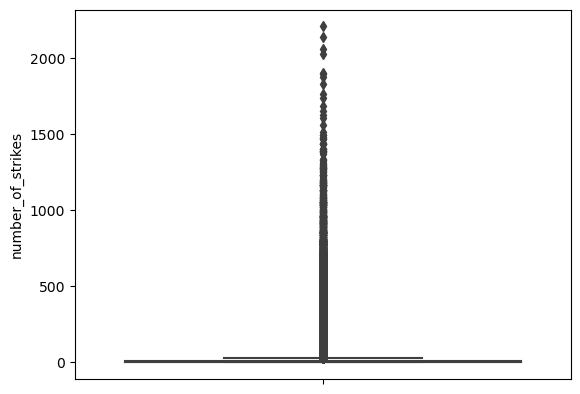

In [52]:
sns.boxplot(y=df['number_of_strikes'])


<Axes: ylabel='number_of_strikes'>

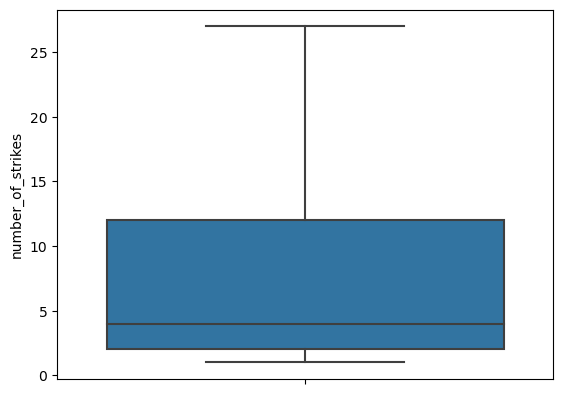

In [53]:
sns.boxplot(y=df['number_of_strikes'], showfliers=False)


In [54]:
df_points = df[['latitude', 'longitude']].drop_duplicates()
df_points.head()


latitude  longitude
0      27.0      -75.0
1      29.0      -78.4
2      27.0      -73.9
3      27.0      -73.8
4      28.0      -79.0

In [55]:
p = px.scatter_geo(df_points, lat='latitude', lon='longitude')
p.show()
